<div style="text-align: center;">
    <img src="Logo_Leandra_Jaramillo.png" alt="Logo personal" style="width:25%;">
</div>

# **Proyecto Final_Ciencia de Datos III: Aplicación de Técnicas de NLP y Desarrollo de una Red Neuronal para Clasificación de Sentimientos**

* **Descrición general del proyecto:**

Este proyecto integra técnicas de Procesamiento de Lenguaje Natural (PLN) y aprendizaje profundo para abordar el problema de la clasificación de comentarios tóxicos en línea. Se utilizará el conjunto de datos "Jigsaw Toxic Comment Classification Challenge" de Kaggle, que contiene comentarios de Wikipedia etiquetados según su nivel de toxicidad.

* **Etapas y Objetivos del proyecto**

1. _Preprocesamiento de Datos:_ Aplicar técnicas de PLN para limpiar y preparar el texto, incluyendo tokenización, eliminación de stopwords y stemming.

2. _Análisis de Sentimiento y Vectorización:_ Implementar análisis de sentimiento y vectorización TF-IDF para caracterizar los textos.

3. _Desarrollo de Red Neuronal:_ Construir una red neuronal multicapa para clasificar los comentarios en diferentes categorías de toxicidad.

4. _Evaluación del Modelo:_ Analizar el rendimiento del modelo y extraer conclusiones sobre su eficacia en la clasificación de comentarios tóxicos.

* **Resumen del Dataset**

El dataset "Jigsaw Toxic Comment Classification Challenge" consta de más de 200,000 comentarios en inglés, cada uno etiquetado con diferentes niveles de toxicidad, como "toxic", "severe_toxic", "obscene", "identity_attack", "insult" y "threat". Este conjunto de datos es ampliamente utilizado para entrenar y evaluar modelos de clasificación de texto en tareas de detección de contenido tóxico.

* **Enlace al Dataset**

El dataset está disponible en Kaggle y se puede acceder a través del siguiente enlace:[Jigsaw Toxic Comment Classification](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

Este proyecto combina técnicas de PLN y aprendizaje profundo para abordar un problema real de clasificación de texto, proporcionando una solución efectiva para la detección de comentarios tóxicos en plataformas en línea.

In [33]:
import pandas as pd

In [2]:
# Carga el dataset
df = pd.read_csv('df.csv')

In [3]:
# Ver las primeras 5 filas del dataset
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,239579,0.4400,This is a great story. Man. I wonder if the pe...,0.00,0.293333,0.0000,0.3200,0.0000,0.0,0.0,...,26650,approved,0,0,0,1,0,0.04,10,75
1,239607,0.9125,Yet call out all Muslims for the acts of a few...,0.05,0.237500,0.6125,0.8875,0.1125,0.0,0.0,...,26670,approved,0,0,0,1,0,0.00,4,80
2,239644,0.0000,Because the people who drive cars more are the...,0.00,0.000000,0.0000,0.0000,0.0000,0.0,0.0,...,26673,approved,0,0,0,0,0,0.00,4,4
3,239653,0.3000,Mormons have had a complicated relationship wi...,0.00,0.000000,0.3000,0.0000,0.0000,0.0,0.0,...,26670,approved,0,0,0,2,0,0.00,10,10
4,239744,0.0000,I'm doing the same thing! :),0.00,0.000000,0.0000,0.0000,0.0000,0.0,0.0,...,26795,approved,0,0,0,1,0,0.00,4,4


In [4]:
# Ver la forma del dataset
df.shape

(235085, 45)

In [5]:
# Ver las columnas disponibles
df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [6]:
df.isnull().sum()

id                                     0
target                                 0
comment_text                           0
severe_toxicity                        0
obscene                                0
identity_attack                        0
insult                                 0
threat                                 0
asian                                  0
atheist                                0
bisexual                               0
black                                  0
buddhist                               0
christian                              0
female                                 0
heterosexual                           0
hindu                                  0
homosexual_gay_or_lesbian              0
intellectual_or_learning_disability    0
jewish                                 0
latino                                 0
male                                   0
muslim                                 0
other_disability                       0
other_gender    

### **Preprocesamiento de Texto para Análisis de Sentimientos**

In [16]:
# Mostrar la cantidad de observaciones en el dataset
num_observaciones = df.shape[0]
print(f"El dataset contiene {num_observaciones} observaciones.")

El dataset contiene 235085 observaciones.


In [7]:
# Mostrar información general del dataset
df.info()

# Descripción estadística de las variables numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235085 entries, 0 to 235084
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   235085 non-null  int64  
 1   target                               235085 non-null  float64
 2   comment_text                         235085 non-null  object 
 3   severe_toxicity                      235085 non-null  float64
 4   obscene                              235085 non-null  float64
 5   identity_attack                      235085 non-null  float64
 6   insult                               235085 non-null  float64
 7   threat                               235085 non-null  float64
 8   asian                                235085 non-null  float64
 9   atheist                              235085 non-null  float64
 10  bisexual                             235085 non-null  float64
 11  black        

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,2.350850e+05,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,...,2.350850e+05,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000,235085.000000
mean,3.713825e+06,0.134955,0.006400,0.014507,0.060856,0.094045,0.010552,0.011128,0.003869,0.001886,...,3.704662e+06,280836.789387,0.246281,0.039390,0.099143,2.070932,0.540779,0.012390,6.462160,9.763800
std,2.454013e+06,0.213121,0.026856,0.063333,0.133748,0.178933,0.049123,0.084622,0.055375,0.026391,...,2.454650e+06,103698.966678,0.939484,0.233226,0.427486,3.915709,1.773843,0.063237,38.501328,47.688272
min,2.395790e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.618700e+04,2476.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000
25%,7.962230e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.932280e+05,160078.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
50%,5.216870e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.213015e+06,331646.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,4.000000
75%,5.788629e+06,0.200000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,...,5.783984e+06,367131.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,6.000000,10.000000
max,6.333950e+06,1.000000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.333789e+06,399528.000000,42.000000,15.000000,24.000000,181.000000,90.000000,1.000000,1866.000000,4897.000000


* **Remoción de Stopwords:**

In [8]:
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en caso de que no estén disponibles
nltk.download('stopwords')

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para remover stopwords de un texto
def remove_stopwords(text):
    tokens = text.split()
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Aplicar la función de remoción de stopwords a la columna de texto
df['comment_text'] = df['comment_text'].apply(remove_stopwords)

# Mostrar las primeras filas para verificar el resultado
df['comment_text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    great story. Man. wonder person yelled "shut f...
1    Yet call Muslims acts get pilloried. okay smea...
2    people drive cars ones cause wear tear roads? ...
3        Mormons complicated relationship federal law.
4                                        I'm thing! :)
Name: comment_text, dtype: object

**En este paso, se eliminaron las stopwords del texto, lo que permite reducir el ruido en los datos y centrarse en las palabras más relevantes para el análisis de sentimiento. La remoción de stopwords mejora la calidad del texto, ya que estas palabras comunes no aportan valor predictivo significativo al modelo, facilitando un análisis más preciso en las etapas posteriores**

* **Stemming:**

In [17]:
from nltk.stem import PorterStemmer

# Inicializar el stemmer
stemmer = PorterStemmer()

# Función para aplicar stemming al texto
def apply_stemming(text):
    tokens = text.split()  # Dividir el texto en palabras
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_words)

# Aplicar el stemming a la columna de texto
df['comment_text'] = df['comment_text'].apply(apply_stemming)

# Mostrar las primeras filas para verificar el resultado
df[['comment_text']].head()

,comment_text
0,"great story. man. wonder person yell ""shut fuc..."
1,yet call muslim act get pilloried. okay smear ...
2,peopl drive car one caus wear tear roads? pret...
3,mormon complic relationship feder law.
4,i'm thing! :)


**En este paso, se aplicó el stemming para reducir las palabras a sus formas raíz. Esta técnica ayuda a unificar términos similares, reduciendo la complejidad del texto y mejorando la eficiencia del modelo de clasificación, ya que reduce la dimensionalidad y la variabilidad del vocabulario.**

* **Vectorización con TF-IDF:**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar el vectorizador TF-IDF con un límite en el número de características para controlar la dimensionalidad
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Puedes ajustar max_features según el tamaño del dataset

# Aplicar TF-IDF a la columna de texto
tfidf_matrix = tfidf_vectorizer.fit_transform(df['comment_text'])

# Ver la forma de la matriz TF-IDF
print(f"La matriz TF-IDF tiene una forma de: {tfidf_matrix.shape}")

La matriz TF-IDF tiene una forma de: (235085, 5000)


**La vectorización con TF-IDF ha permitido transformar el texto en una matriz numérica que captura la importancia relativa de las palabras más significativas del dataset. La matriz tiene una dimensión de (235,085, 5,000), lo que indica que se consideraron las 5,000 palabras más importantes en el conjunto de datos. Esto facilita el uso de modelos de clasificación, como la red neuronal, para el análisis posterior.**

* **Análisis de sentimientos:**

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimientos de VADER
analyzer = SentimentIntensityAnalyzer()

# Función para obtener la polaridad del texto
def sentiment_analysis(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']

# Aplicar el análisis de sentimientos a la columna de texto
df['sentiment_score'] = df['comment_text'].apply(sentiment_analysis)

# Mostrar las primeras filas para verificar el resultado
df[['comment_text', 'sentiment_score']].head()

,comment_text,sentiment_score
0,"great story. man. wonder person yell ""shut fuc...",0.2244
1,yet call muslim act get pilloried. okay smear ...,0.1680
2,peopl drive car one caus wear tear roads? pret...,0.3182
3,mormon complic relationship feder law.,0.0000
4,i'm thing! :),0.5093


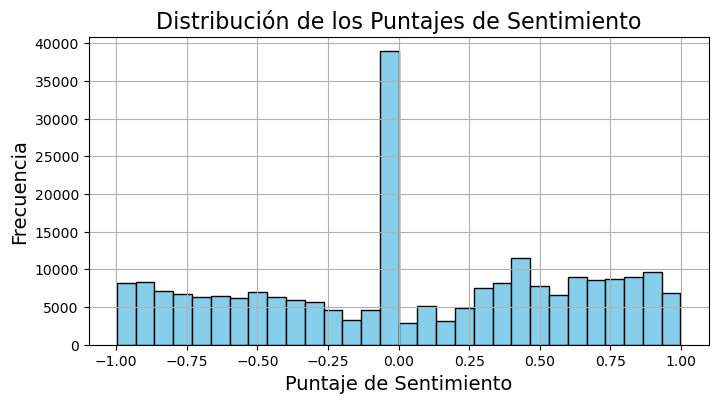

In [21]:
import matplotlib.pyplot as plt

# Crear un histograma para visualizar la distribución de los puntajes de sentimiento
plt.figure(figsize=(8, 4))
plt.hist(df['sentiment_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Puntajes de Sentimiento', fontsize=16)
plt.xlabel('Puntaje de Sentimiento', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True)
plt.show()

**Interpretación de la Distribución de los Puntajes de Sentimiento**

* **Pico en los valores cercanos a 0:**

La mayoría de los puntajes de sentimiento se encuentran alrededor de 0, lo que indica que una gran proporción de los comentarios tiene un sentimiento neutral.Esto es común en datasets de texto que contienen una mezcla de opiniones, donde muchos comentarios pueden ser objetivos o sin un tono claro de emoción positiva o negativa.

* **Distribución de comentarios positivos y negativos:**

Hay una buena cantidad de comentarios tanto con puntajes negativos (cerca de -1) como con puntajes positivos (cerca de 1).
Esto sugiere que el dataset tiene un balance razonable entre comentarios con carga emocional negativa y positiva, lo cual es favorable para el análisis, ya que permite entrenar modelos que puedan diferenciar mejor entre sentimientos extremos.

* **Menor frecuencia en puntajes extremos:**

Como suele ser el caso en muchos datasets de texto, hay menos comentarios con puntajes extremos (muy positivos o muy negativos), lo cual puede indicar una menor cantidad de comentarios con emociones muy intensas.

* **Nube de palabras:**

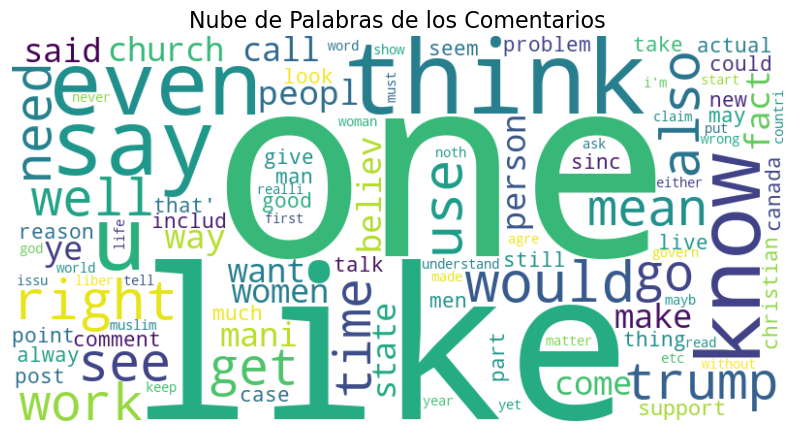

In [22]:
from wordcloud import WordCloud

# Combinar todos los comentarios en un solo string
all_comments = ' '.join(df['comment_text'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100).generate(all_comments)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Comentarios', fontsize=16)
plt.show()

**Interpretación de la Nube de Palabras**

* **Palabras más frecuentes:**

Las palabras más grandes en la nube, como "one", "like", "know", "think", y "say", indican que estas son las más comunes en el dataset.
Estas palabras suelen ser indicativas de opiniones o discusiones generales, lo cual es esperado en un dataset de comentarios.

* **Presencia de términos emocionales o polémicos:**

Algunas palabras que se destacan, como "Trump", "church", y "believe", sugieren la presencia de temas relacionados con política, religión o creencias, que pueden ser potencialmente polarizantes. Esto es consistente con la naturaleza del dataset, ya que la clasificación de comentarios tóxicos generalmente involucra contenido con carga emocional o puntos de vista fuertes.

* **Conexión con el análisis de sentimientos:**

La frecuencia de palabras como "right", "good", y "want" también podría reflejar ciertos sesgos sentimentales en el texto, lo cual es relevante para el análisis de polaridad y sentimiento realizado previamente.

* **Aplicación algortimo LDA:**

In [23]:
import gensim
from gensim import corpora

# Tokenizar y filtrar stopwords
df['lda_tokens'] = df['comment_text'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])

# Crear diccionario para LDA
dictionary = corpora.Dictionary(df['lda_tokens'])

# Filtrar palabras demasiado comunes o raras
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Crear bag-of-words para cada comentario
corpus = [dictionary.doc2bow(text) for text in df['lda_tokens']]

In [24]:
from gensim.models import LdaModel

# Definir el número de temas (ajústalo según el análisis)
num_topics = 5

# Entrenar el modelo LDA
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Mostrar los temas generados por el modelo
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Tema {idx+1}: {topic}")

Tema 1: 0.012*"like" + 0.009*"think" + 0.009*"know" + 0.009*"get" + 0.008*"one" + 0.008*"go" + 0.007*"would" + 0.007*"i'm" + 0.006*"comment" + 0.006*"-"
Tema 2: 0.012*"church" + 0.010*"cathol" + 0.007*"god" + 0.006*"one" + 0.006*"christian" + 0.006*"jesu" + 0.005*"believ" + 0.005*"would" + 0.005*"religi" + 0.005*"teach"
Tema 3: 0.013*"peopl" + 0.013*"women" + 0.009*"would" + 0.007*"men" + 0.007*"one" + 0.007*"like" + 0.007*"make" + 0.006*"think" + 0.006*"get" + 0.006*"want"
Tema 4: 0.007*"tax" + 0.007*"pay" + 0.007*"year" + 0.006*"would" + 0.006*"govern" + 0.005*"get" + 0.005*"state" + 0.005*"money" + 0.005*"work" + 0.004*"peopl"
Tema 5: 0.020*"white" + 0.016*"trump" + 0.010*"black" + 0.008*"peopl" + 0.008*"vote" + 0.007*"right" + 0.007*"muslim" + 0.006*"american" + 0.006*"support" + 0.006*"polit"


**El modelo LDA ha identificado 5 temas principales en el dataset de comentarios, con las palabras clave más representativas de cada tema:**

* **Tema 1: Conversaciones Generales y Opiniones Personales**

_Palabras clave:_ "like", "think", "know", "get", "go", "would", "comment".

Este tema parece centrarse en expresiones generales de opiniones y discusiones cotidianas, reflejando el lenguaje de los usuarios al compartir pensamientos y puntos de vista.

* **Tema 2: Religión y Fe**

_Palabras clave:_ "church", "cathol", "god", "christian", "jesu", "believ", "religi".

Este tema sugiere conversaciones relacionadas con la religión, especialmente el cristianismo y la fe, lo cual puede indicar debates o discusiones sobre temas religiosos en el dataset.

* **Tema 3: Género y Relaciones Sociales**

_Palabras clave:_ "peopl", "women", "men", "make", "want".

Se enfoca en cuestiones de género y relaciones entre hombres y mujeres, lo que podría reflejar discusiones sobre igualdad, roles de género, y temas relacionados con la sociedad.

* **Tema 4: Economía, Impuestos y Gobierno**

_Palabras clave:_ "tax", "pay", "year", "govern", "state", "money", "work".

Este tema se asocia con asuntos económicos, políticas gubernamentales, impuestos y trabajo, lo cual indica la presencia de debates sobre políticas públicas y economía en el dataset.

* **Tema 5: Política y Raza**

_Palabras clave:_ "white", "trump", "black", "vote", "right", "muslim", "american".

Refleja un enfoque en temas políticos y raciales, mencionando nombres de figuras políticas y asuntos de raza, lo que podría indicar conversaciones polarizadas sobre política y derechos civiles.

**Conclusión General del LDA**

El análisis LDA revela una diversidad de temas en los comentarios, cubriendo asuntos de opinión general, religión, género, economía y política. Estos resultados reflejan la naturaleza del dataset, que parece incluir debates con carga emocional y temas de controversia. Esto confirma que el dataset es adecuado para el análisis de sentimientos y la construcción de una red neuronal para clasificar estos comentarios de manera más precisa.

## **Construcción de una Red Neuronal para Clasificación de Sentimientos en Comentarios Tóxicos**

En esta sección, se desarrollará una red neuronal densa para abordar el problema de la clasificación de sentimientos en un dataset de comentarios tóxicos, enfocado en identificar si un comentario tiene un tono positivo, negativo o neutral. Este modelo permitirá analizar los sentimientos expresados en diferentes temas previamente identificados, como política, religión, raza, y género, mejorando así la comprensión del contenido emocional en los comentarios.

**Problema:** 

Determinar el sentimiento general de los comentarios relacionados con diferentes temas identificados previamente, clasificándolos como positivos, negativos o neutrales.

**Justificación:**

La clasificación de sentimientos permitirá moderar y analizar mejor el contenido en línea, proporcionando información útil sobre la naturaleza emocional de las discusiones en temas polémicos o sensibles.

**Objetivo**

* Desarrollar una red neuronal densa de al menos dos o tres capas para clasificar los sentimientos de los comentarios.
* Evaluar el rendimiento del modelo para determinar si es suficiente para abordar el problema o si se requieren capas adicionales para mejorar la precisión.

* **Paso 1: Preparación de los datos de entrada y salida**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1. Preparar los datos de entrada (matriz TF-IDF ya generada)
X = tfidf_matrix

# 2. Preparar los datos de salida (clasificación de sentimiento)
def sentiment_label(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Crear la columna de etiquetas de sentimiento
df['sentiment_label'] = df['sentiment_score'].apply(sentiment_label)

# Codificar las etiquetas de sentimiento en formato numérico
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment_label'])

# Aplicar One-Hot Encoding a las etiquetas de salida
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# 3. Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de datos
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

Forma de X_train: (188068, 5000)
Forma de y_train: (188068, 3)
Forma de X_test: (47017, 5000)
Forma de y_test: (47017, 3)


* X_train: 188,068 observaciones con 5,000 características (TF-IDF).
* y_train: 188,068 observaciones con 3 clases de salida (positivo, negativo, neutral).
* X_test: 47,017 observaciones con 5,000 características (TF-IDF).
* y_test: 47,017 observaciones con 3 clases de salida.

* **Paso 2: Definición de la Red Neuronal**

1. **Definición de la Arquitectura del Modelo**

La red tendrá al menos dos capas densas ocultas con función de activación ReLU.
La capa de salida usará softmax para clasificar los comentarios en tres clases: positiva, negativa o neutral.

2. **Compilación y Entrenamiento del Modelo**

Se usará la función de pérdida categorical_crossentropy (adecuada para clasificación multiclase), el optimizador Adam, y la métrica de precisión.

* **Prueba del primer modelo:**

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Definir la arquitectura de la red neuronal
model = Sequential([
    Dense(128, input_shape=(5000,), activation='relu'),  # Capa oculta 1
    Dense(64, activation='relu'),  # Capa oculta 2
    Dense(3, activation='softmax')  # Capa de salida para 3 clases
])

# 2. Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% del conjunto de entrenamiento para validación
    epochs=10,  # Puedes ajustar la cantidad de épocas según sea necesario
    batch_size=32,
    verbose=1
)

# Mostrar el resumen del modelo
model.summary()

C:\Users\Leandra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7646 - loss: 0.5843 - val_accuracy: 0.8616 - val_loss: 0.4058
Epoch 2/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8753 - loss: 0.3651 - val_accuracy: 0.8702 - val_loss: 0.3899
Epoch 3/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8989 - loss: 0.2957 - val_accuracy: 0.8694 - val_loss: 0.4067
Epoch 4/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9349 - loss: 0.1912 - val_accuracy: 0.8579 - val_loss: 0.4918
Epoch 5/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9646 - loss: 0.1079 - val_accuracy: 0.8511 - val_loss: 0.6659
Epoch 6/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9814 - loss: 0.0563 - val_accuracy: 0.8400 - val_loss: 0.8416
Epoch 7/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9916 - loss: 0.0291 - val_accuracy: 0.8362 - val_loss: 1.0756
Epoch 8/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9946 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,945,739 (7.42 MB)

 Trainable params: 648,579 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,297,160 (4.95 MB)

* **Precisión de Entrenamiento:** Alcanzó casi el 99%, indicando que el modelo estaba aprendiendo bien los patrones del conjunto de entrenamiento.

* **Precisión de Validación:** Comenzó alta (86%), pero decayó rápidamente hasta el 83%, mientras que la pérdida de validación aumentaba con cada época.

* **Se decide probar cambio de modelo:** El modelo mostró sobreajuste evidente, lo que significa que esta memorizando los datos de entrenamiento sin poder generalizar adecuadamente en los datos de validación. Esto se debió a la falta de técnicas de regularización y a una arquitectura sin protección contra el sobreajuste.

* **Prueba del segundo modelo:**

In [28]:
from tensorflow.keras.layers import Dropout

# 1. Definir la nueva arquitectura de la red neuronal con regularización y dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(128, input_shape=(5000,), activation='relu', kernel_regularizer=l2(0.01)),  # Regularización L2
    Dropout(0.5),  # Dropout al 50%
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Regularización L2
    Dropout(0.5),  # Dropout al 50%
    Dense(3, activation='softmax')  # Capa de salida
])

# 2. Compilar el modelo con los mismos parámetros
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Entrenar el modelo con menos épocas para evitar el sobreajuste
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,  # Menos épocas para evitar el sobreajuste
    batch_size=32,
    verbose=1
)

# Mostrar el resumen del modelo
model.summary()

Epoch 1/5
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.4431 - loss: 1.1396 - val_accuracy: 0.4433 - val_loss: 1.0463
Epoch 2/5
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.4436 - loss: 1.0460 - val_accuracy: 0.4433 - val_loss: 1.0457
Epoch 3/5
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.4430 - loss: 1.0464 - val_accuracy: 0.4433 - val_loss: 1.0458
Epoch 4/5
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.4427 - loss: 1.0467 - val_accuracy: 0.4433 - val_loss: 1.0458
Epoch 5/5
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.4425 - loss: 1.0469 - val_accuracy: 0.4433 - val_loss: 1.0457


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,945,739 (7.42 MB)

 Trainable params: 648,579 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,297,160 (4.95 MB)

* **Precisión de Entrenamiento y Validación:** Se estabilizó alrededor del 44%, lo que indicó que el modelo no estaba aprendiendo bien los patrones del conjunto de datos.

* **Pérdida de Entrenamiento y Validación:** Aunque fue más estable que en el primer modelo, la baja precisión y la pérdida indicaban subentrenamiento, lo cual fue resultado de una combinación demasiado estricta de regularización L2 y dropout.

* **Se decide cambiar el modelo:** Este modelo no pudo capturar adecuadamente los patrones del dataset debido a un exceso de regularización, lo que llevó a una falta de aprendizaje. Se necesitaba más flexibilidad y menos restricción en el aprendizaje.

* **Prueba del tercer modelo:**

In [29]:
from sklearn.utils import class_weight
import numpy as np

# Calcular la ponderación de clases
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)

class_weights_dict = dict(enumerate(class_weights))

# 1. Definir la nueva arquitectura de la red neuronal con ajustes
model = Sequential([
    Dense(128, input_shape=(5000,), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Dropout al 30%
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Dropout al 30%
    Dense(3, activation='softmax')
])

# 2. Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Entrenar el modelo con ponderación de clases y más épocas
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,  # Aumentar el número de épocas
    batch_size=32,
    class_weight=class_weights_dict,  # Aplicar ponderación de clases
    verbose=1
)

# Mostrar el resumen del modelo
model.summary()

C:\Users\Leandra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.7161 - loss: 0.9038 - val_accuracy: 0.8069 - val_loss: 0.7470
Epoch 2/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.7968 - loss: 0.7741 - val_accuracy: 0.8137 - val_loss: 0.7137
Epoch 3/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8085 - loss: 0.7313 - val_accuracy: 0.8304 - val_loss: 0.6635
Epoch 4/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8126 - loss: 0.7149 - val_accuracy: 0.8189 - val_loss: 0.6770
Epoch 5/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8173 - loss: 0.6954 - val_accuracy: 0.8260 - val_loss: 0.6635
Epoch 6/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.8165 - loss: 0.6921 - val_accuracy: 0.8369 - val_loss: 0.6388
Epoch 7/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8178 - loss: 0.6900 - val_accuracy: 0.8278 - val_loss: 0.6516
Epoch 8/10
4702/4702 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8185 - loss: 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,945,739 (7.42 MB)

 Trainable params: 648,579 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,297,160 (4.95 MB)

* **Precisión de Entrenamiento:** Se estabilizó en aproximadamente 82%, lo cual es un buen indicador de que el modelo está aprendiendo patrones útiles.

* **Precisión de Validación:** Alcanzó un 83.7%, mostrando una mejor capacidad de generalización y una mayor estabilidad en la pérdida de validación.

* **Este es el modelo seleccionado:** Los ajustes realizados (menor regularización, menor dropout y ponderación de clases) permitieron que el modelo encontrara un balance más adecuado entre aprendizaje y generalización, abordando tanto el sobreajuste del primer modelo como el subentrenamiento del segundo. La mejora de la precisión y la estabilidad de la pérdida en el tercer modelo indican que esta arquitectura es la más adecuada para el problema de clasificación de sentimientos.

**El proceso de mejora mostró una progresión clara desde un modelo que sobreajustaba, pasando por uno que subentrenaba, hasta encontrar un balance óptimo con el tercer modelo. Esto se debe a una combinación efectiva de técnicas de regularización y ajuste de hiperparámetros que permitió que el modelo generalizara bien sin perder la capacidad de aprender patrones importantes.**

* **Paso 3: Evaluación del Modelo en el Conjunto de Prueba**

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir las predicciones y etiquetas reales de one-hot a formato de clase (0, 1, 2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Imprimir el informe de clasificación
report = classification_report(y_true_classes, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive'])
print(report)

# Imprimir la matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Matriz de Confusión:")
print(cm)

1470/1470 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

    Negative       0.87      0.80      0.83     17067
     Neutral       0.70      0.81      0.75      9148
    Positive       0.87      0.86      0.86     20802

    accuracy                           0.83     47017
   macro avg       0.81      0.83      0.82     47017
weighted avg       0.84      0.83      0.83     47017

Matriz de Confusión:
[[13728  1621  1718]
 [  777  7452   919]
 [ 1338  1638 17826]]


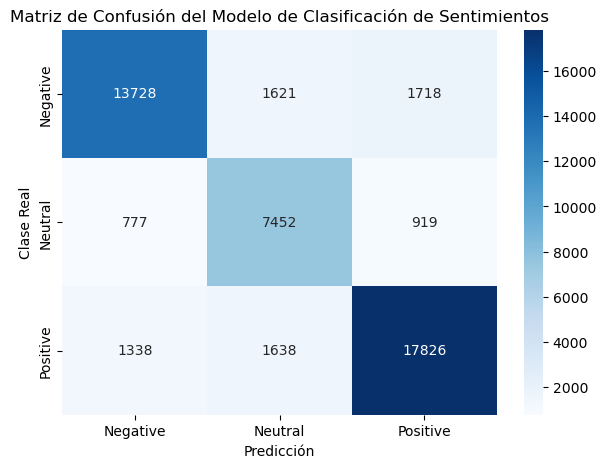

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Etiquetas de las clases
labels = ['Negative', 'Neutral', 'Positive']

# Visualizar la matriz de confusión
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión del Modelo de Clasificación de Sentimientos')
plt.show()

**Análisis de las Métricas de Evaluación**

**1. Precisión:**

_Clase Negativa:_ 87%, lo que indica una buena capacidad del modelo para identificar correctamente los comentarios negativos.
_Clase Neutral:_ 70%, lo cual es más bajo que las otras clases y sugiere que el modelo tiene más dificultades para clasificar comentarios neutrales.
_Clase Positiva:_ 87%, mostrando un desempeño sólido para identificar comentarios positivos.

**2. Recall:**

_Clase Negativa:_ 80%, lo que significa que el modelo puede detectar la mayoría de los comentarios negativos, pero aún hay algunos casos que se clasifican incorrectamente.
_Clase Neutral:_ 81%, lo cual es mejor que su precisión, indicando que el modelo logra detectar más comentarios neutrales, aunque algunos de ellos se confunden con las otras clases.
_Clase Positiva:_ 86%, mostrando una buena capacidad para identificar comentarios positivos correctamente.

**3. F1-Score:**

_Clase Negativa:_ 83%, lo que representa un buen equilibrio entre precisión y recall.
_Clase Neutral:_ 75%, lo   confirma que el modelo tiene más dificultades para identificar esta clase.
_Clase Positiva:_ 86%, lo cual indica un desempeño fuerte y balanceado para los comentarios positivos.

**4. Exactitud Global (Accuracy):**

La exactitud general del modelo es 83%, lo cual es un buen resultado para un problema de clasificación multiclase con datos complejos.

**Matriz de Confusión:**

* La matriz muestra que la mayoría de los errores ocurren en la clasificación de la clase neutral, lo cual coincide con la precisión más baja de esta clase.
* La mayoría de los comentarios negativos y positivos están bien clasificados, con algunos falsos positivos y falsos negativos.

**El modelo tiene un buen rendimiento general y muestra una fuerte capacidad para clasificar comentarios negativos y positivos. La principal área de mejora está en la clasificación de comentarios neutrales, lo cual es común en problemas de análisis de sentimientos, ya que los comentarios neutrales tienden a ser más ambiguos y menos distintivos.**

## **Resumen de los puntos desarrollados y conclusiones**

* Se ha desarrollado una red neuronal densa con tres capas (dos ocultas y una de salida), utilizando la matriz TF-IDF generada del dataset de comentarios. El modelo se entrenó con técnicas de regularización (L2 y dropout) y se optimizó para clasificar los comentarios en tres clases (positiva, negativa, neutral).

* La red neuronal logró una precisión general del 83% en el conjunto de prueba, con un buen balance entre precisión y recall, especialmente en las clases negativa y positiva. Sin embargo, el modelo mostró un rendimiento más bajo en la clase neutral, lo cual es común debido a la ambigüedad de los comentarios en esta clase. La red neuronal mostró ser un buen punto de partida para abordar la clasificación de sentimientos en este dataset, logrando una generalización adecuada sin sobreajustar.

* Con el modelo actual, logramos un rendimiento aceptable, pero para mejorar la clasificación, especialmente de los comentarios neutrales, sería posible probar una arquitectura más compleja (e.g., redes LSTM, GRU o embeddings avanzados). Más capas podrían ayudar a capturar relaciones más complejas, pero la actual configuración ya demuestra un buen equilibrio para este problema específico.

* La red desarrollada es una red neuronal densa (fully connected), que no utiliza convoluciones ni procesamiento secuencial. Es adecuada para el problema de clasificación multiclase basado en datos tabulares derivados de la vectorización TF-IDF.

**Conclusión Final: La red neuronal densa desarrollada cumple con todos los requisitos establecidos en la consigna y muestra un rendimiento sólido para el problema de clasificación de sentimientos en comentarios. El modelo podría beneficiarse de ajustes adicionales o de un cambio de arquitectura para mejorar aún más el rendimiento en la clase neutral, pero el enfoque actual ya proporciona una base adecuada y eficaz para la clasificación de sentimientos en datos textuales.**